<h2>Nonlinear Support Vector Machine</h2>

Polynomial degree = 3
Dimension of extended space = 9
Parameters of linear classifier in extended space:
w = [-0.40906814  0.17897386 -0.03285319 -0.02294383 -0.03144722  0.0077018
  0.01553396 -0.01288002  0.03024686]
b = -0.026999328447199083


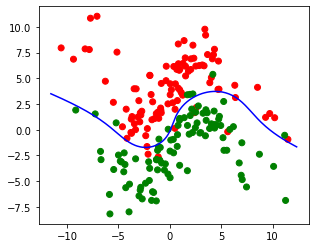

In [1]:
# Nonlinear Support Vector Machine
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
from skimage import measure
import itertools
from math import sin, cos, pi

d = 3
C = 5.

def monomials(x, d):
    '''Return an array of all products of degree <= d
    composed from the coordinates of vector x'''
    # m = [1.]
    m = []
    for l in range(1, d+1):
        for i in itertools.combinations_with_replacement(x, l):
            v = np.prod(i)
            m.append(v)
    return np.array(m)

def f(x):
    '''Graph of this function separates two classes of points'''
    return 3.*sin(0.5*x) + 1.

# xmin = -10.; xmax = 10.;
# ymin = -10.; ymax = 10.;
m = 100
class1 = []
class2 = []
for i in range(m):
    x1 = random.normalvariate(0., 4.)
    y1 = f(x1) + random.normalvariate(3., 2.)
    class1.append([x1, y1])
    x2 = random.normalvariate(0., 4.)
    y2 = f(x2) - random.normalvariate(3., 2.)
    class2.append([x2, y2])
x = np.array(class1 + class2)
# print("x:", x)
y = np.array([1.]*m + [-1.]*m)
# print("y:", y)

%matplotlib inline
ax = plt.gca()
ax.set_aspect("equal")
# ax.set_xlim(-10., 10.)
# ax.set_ylim(-10., 10.)
ax.scatter(
    [xx[0] for xx in x],
    [xx[1] for xx in x],
    color = [("red" if yy > 0 else "green") for yy in y]
)

xext = np.array([monomials(xx, d) for xx in x])
k = len(xext[0])
print("Polynomial degree =", d)
print("Dimension of extended space =", k)

perm = np.random.permutation(2*m)
x = x[perm]
xext = xext[perm]
y = y[perm]

def hingeLoss(x):
    return max(1. - x, 0.)

def lossFunction(wb):
    '''Loss function to be minimized in Support Vector Machine'''
    n = len(xext)
    w = wb[:-1]
    b = wb[-1]
    s = 0.
    for i in range(n):
        c = y[i]*(w @ xext[i] - b)
        l = hingeLoss(c)
        s += l
    err = w@w + (C/n)*s
    # print("w:", w, "b:", b, "err:", err)
    return err

wb = np.array([0.]*k + [0])
res = minimize(lossFunction, wb)
# print("res;", res)

w = res.x[:-1]
b = res.x[-1]
print("Parameters of linear classifier in extended space:")
print("w =", w)
print("b =", b)

def classifier(x):
    '''Linear classifier constructed by SVM method'''
    xe = monomials(x, d)
    return w@xe - b

# Draw the isoline defined by the equation 
#     classifier(x) = 0
xmin = min([xx[0] for xx in x]) - 1.
xmax = max([xx[0] for xx in x]) + 1.
ymin = min([xx[1] for xx in x]) - 1.
ymax = max([xx[1] for xx in x]) + 1.
dx = 0.1; dy = dx
xSteps = int((xmax - xmin)/dx)
ySteps = int((ymax - ymin)/dy)
def xcoord(j):
    return xmin + j*dx
def ycoord(i):
    return ymin + i*dy
# Matrix of function values
a = [[0.]*xSteps for i in range(ySteps)]
a = np.array(a)
for i in range(ySteps):
    y = ycoord(i)
    for j in range(xSteps):
        x = xcoord(j)
        v = classifier(np.array([x, y]))
        a[i, j] = v
        
contours = measure.find_contours(a, 0.)
for contour in contours:
    ax.plot(
        [xcoord(c[1]) for c in contour],
        [ycoord(c[0]) for c in contour],
        color="blue"
    )
